# Week 6 : Artificial neural network in PyTorch
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

In this lab, you will practice simple deep learning model in Pytorch.
```
Lab Plan
1. Theoretical issues with ANNs
2. Deep learning frameworks
3. Introduction to Pytorch : Linear Regression with Pytorch
3. Simple ANN model for classification
4. Training ANNs
```

<hr>


## 1. Theoretical issues
Ordinary fully connected neural nets consists of Dense layers, activations, and output layer.

1. What's the difference between deep learning and normal machine learning?
2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
3. Can the perceptron find a non-linear decision boundary?
4. In multi-hidden layers network, what's the need of non-linear activation function?
5. Is random weight assignment better than assigning same weights to the units in the hidden layer.
---

## 2. Deep learning framework : PyTorch

Getting started with Pytorch

## 2.1 Linear Regression with Numpy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Data Generation
def generate_data(size = 100):
    x = np.random.rand(size, 1)
    y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

    # Shuffles the indices
    idx = np.arange(size)
    np.random.shuffle(idx)

    # split to train and validation 80:20
    split = int(size * 0.8)
    train_idx = idx[:split]
    val_idx = idx[split:]

    # Generate train and validation sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_val, y_val = x[val_idx], y[val_idx]

    return x_train, y_train, x_val, y_val

## Generate Dataset

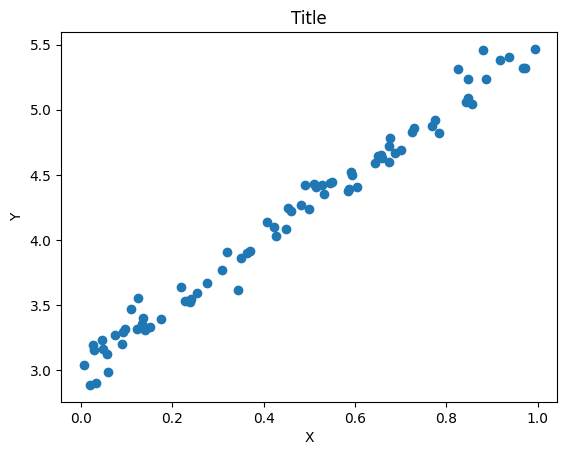

In [3]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Title")
plt.show()

## Gradient Descent algorithm

Gradient descent consist of 3 basic steps :

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be :

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

## Linear Regression model training

In [4]:
# Initializes parameters "a" and "b" randomly

a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1: Computes y hat
    yhat = a * x_train + b

    # Compute error and Loss using MSE
    error = yhat - y_train
    loss = np.mean(error ** 2)

    # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
    a_grad = np.mean(2 * error)
    b_grad = np.mean(2 * error * x_train)

    # Step 3: Update parameters using gradients and the learning rate
    a = a - learning_rate * a_grad
    b = b - learning_rate * b_grad

print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [0.9754276887475629, -0.49231059727999804]
Final values of [a, b] : [50576631.86782738, -27258324.23004546]


## Pytorch basics

### Tensors

* How to create a Tensor
* Operations on tensors
* Data types for Tensors### Create a Tensor

Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [5]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

# Here we can see the difference - notice that .type() is more useful
# since it tells WHERE the tensor device

print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.DoubleTensor


## Linear Regression (Numpy -> PyTorch)

In [6]:
a = torch.randn(1, device=device, requires_grad=True)
b = torch.randn(1, device=device, requires_grad=True)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

learning_rate = 0.01

for epoch in range(100):

  # Forward pass
    yhat = a * x_train_tensor + b

    # Calculate the mean squared error
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()

    # Backpropagation and gradient computation
    loss.backward()  # Compute gradients

    # Gradient descent to update parameters a and b
    with torch.no_grad():  # Ensure that we don't track these operations for autograd
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad

    # Zero the gradients for the next iteration
    a.grad.zero_()
    b.grad.zero_()

print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [0.6626335382461548, -0.9755630493164062]
Final values of [a, b] : [2.4136202335357666, 2.6440837383270264]


## Linear Regression PyTorch

In [7]:
from torch import nn
import torch.optim as optim # for optimizer
from torch.utils.tensorboard import SummaryWriter #for Tensorboard

class LinearRegression(nn.Module):
  def __init__(self,input_dim=1,output_dim=1):
    super(LinearRegression, self).__init__()
    self.layer1 = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    x = self.layer1(x)
    return x

### 2.1 Feed Forward Neural Network
An artificial neural network wherein connections between the nodes do not form a cycle.
<!--![alt text](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png)-->

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png" width="1000"/>
</div>


### Model Design in Pytorch
we have three simple parts that we need to build:
1. Data Loading process.
2. Model building.
3. the training loops.

<strong>Data Loading</strong>

Data Loading in pytorch is very easy and broken into 3 steps:
1. Data Source
2. Data Transformations
3. Data Loader



## 3. Loading data

Pytorch uses data loading utility which is called `DataLoader` that supports:
automatic batching, transformation, single- and multi-process data loading and more..

In [8]:
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

data_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST('./data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('./data', train=False,
                            transform=data_transformations)

train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 33821986.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110626204.41it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44962106.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6429473.09it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



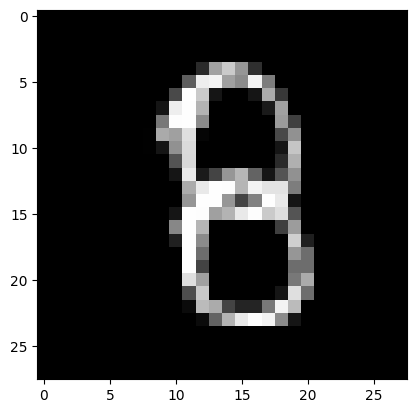

In [9]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
plt.imshow(images[2].reshape(28,28), cmap="gray")

## 4. Model building
1. Defining components: <br/>
This step is done in the constructor, where you will define the layers that will be used accordingly in the next step.
2. Network flow: <br/>
This step is done in the forward function. Where you will get the input batch as an argument then you will use the defined layers in the previous step to define the flow of the network then you will return the output batch.


Pytorch is a dynamic framework, where you can use primitive python keywords with it.
You can use if and while statements. Also, it can accepts and returns more than one batch.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)  # Hidden layer with 250 neurons
        self.fc3 = nn.Linear(250, 100)  # Hidden layer with 100 neurons
        self.fc4 = nn.Linear(100, 10)   # Output layer with 10 neurons for 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second hidden layer
        x = F.relu(self.fc3(x))  # Apply ReLU activation to the third hidden layer
        x = self.fc4(x)          # Output layer without activation function
        return F.log_softmax(x, dim=1)  # Apply log_softmax to get the output probabilities

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)


## 5. Training loops
After that we should define the loops over tha batches and run the training on.

In [11]:
# Define training params
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 10

## 5.1 Define the training procedure

In [12]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

## 5.2 Define the evaluation procedure

In [13]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Move the data and target to the device
            data, target = data.to(device), target.to(device)

            # Forward pass to get the output
            output = model(data)

            # Compute the loss
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss

            # Get the index of the max log-probability (predicted class)
            pred = output.argmax(dim=1, keepdim=True)

            # Check how many predictions are correct
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average test loss
    test_loss /= len(test_loader.dataset)

    # Print the test results
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


## 5.3 Training Model

In [14]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299873
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.298542
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.286807
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.276001
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.277189
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.259048
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.253139
Train Epoch: 1 [2240/60000 (4%)]	Loss: 2.240181
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.183093
Train Epoch: 1 [2880/60000 (5%)]	Loss: 2.129366
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.109027
Train Epoch: 1 [3520/60000 (6%)]	Loss: 2.133466
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.955463
Train Epoch: 1 [4160/60000 (7%)]	Loss: 1.963291
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.910379
Train Epoch: 1 [4800/60000 (8%)]	Loss: 1.771977
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.578972
Train Epoch: 1 [5440/60000 (9%)]	Loss: 1.696385
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.382844
Train Epoch: 1 [6080/60000 (10%)]	Loss: 1.375840
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.33

## 6. Save model

In [15]:
torch.save(model.state_dict(), 'linear_regression_model.pth')

## <center>Self-practice <center>

Using Dataset from assignment 1
1. Define, train and evaluate an ANN for Regression and Classification
1. Plot the loss and accuracy of the model for each training iteration
    
ANN should be implemented in PyTorch

In [16]:
# !pip install ydata_profiling

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Lasso, LassoCV
# from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Regression task

## Gather and preprocess your regression dataset.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Loading Data from a JSON File
with open('/content/drive/MyDrive/Colab Notebooks/ML/Lab 4/couriers_data.json', 'r') as file:
    data = pd.read_json(file)

In [21]:
# Profiling data
# report = ProfileReport(data)
# report.to_file('data_profile_report.html')

From the report, it is evident that the data contains categorical features that need to be processed. To do this, you can use Label Encoding or one-hot encoding. In this task, the mode of transportation can be considered as ordinal variables.

In [22]:
# Handling Categorical Features
category_mapping = {
    "foot": 1,
    "bicycle": 2,
    "scooter": 3,
    "automobile": 4,
}

data['courier_transport'] = data['courier_transport'].map(category_mapping)

It is also visible from the report that we have two columns with timestamps that, according to the task conditions, we will no longer need after performing the required calculations. Let's perform the necessary calculations and drop the two timestamp columns.

In [23]:
# Transformation of timestamp columns
data['work_start'] = pd.to_datetime(data['work_start'])
data['work_finish'] = pd.to_datetime(data['work_finish'])

# Calculating the difference between 'work_finish' and 'work_start' in minutes.
data['hours_engaged'] = (data['work_finish'] - data['work_start']).dt.total_seconds() / 60

# Removing the two columns 'work_start' and 'work_finish'.
data.drop(['work_start', 'work_finish'], axis=1, inplace=True)

After loading and processing the data, we need to split it into features and targets.

In [24]:
# We split the data into features and targets.
X = data.drop('total_deliveries', axis=1)
y = data[['total_deliveries']]


Next, it is necessary to split the data into training and testing datasets in order to conduct the training and performance evaluation of the machine learning model.

In [25]:
# We split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

To ensure neutrality towards the weight of different features, we apply data scaling.

In [26]:
# We scale the data.
columns_to_scale = [name for name in X_train.columns if name != 'courier_transport']
scaler = StandardScaler()

scaler.fit(X_train[columns_to_scale])
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## Feature selection and creation.

To assess feature importance and select the best features for further training, we will train two models: Lasso and LassoCV. After comparing their results, we will be able to determine which features can be excluded from our dataset for more effective model training.

In [27]:
# Let's create an instance of the Lasso model:
lasso = Lasso()
lasso.fit(X_train, y_train)

print('Lasso coef', lasso.coef_)

y_pred = lasso.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination  R2:', metrics.r2_score(y_test, y_pred))

Lasso coef [-0.          0.          3.3185418  -0.         -0.          0.91680957]
Mean Absolute Error: 2.654705257599654
Root Mean Squared Error: 3.6618011933926153
Coefficient of determination  R2: 0.5532542199934867


In [28]:
# Let's create an instance of LassoCV with cross-validation:
lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)

print('LassoCV coef', lasso_cv.coef_)

y_pred = lasso_cv.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coefficient of determination  R2:', metrics.r2_score(y_test, y_pred))

LassoCV coef [ 0.          0.2633966   3.94543263 -0.08829676 -0.24219562  1.52772364]
Mean Absolute Error: 2.255459837065044
Root Mean Squared Error: 3.447522622445247
Coefficient of determination  R2: 0.6040091195153425


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Based on the results:

Lasso has an MAE (Mean Absolute Error) of approximately 2.710, an RMSE (Root Mean Squared Error) of approximately 3.880, and an R-squared (R2) of approximately 0.593.

LassoCV has an MAE of approximately 2.400, an RMSE of approximately 3.648, and an R2 of approximately 0.640.

From these metrics, we can conclude that LassoCV performs better, as it has lower MAE and RMSE values and a higher R2 value, indicating more accurate and explainable predictions.

However, it's worth noting that LassoCV shows only a slight improvement compared to Lasso, while Lasso removes a larger number of features. This can be useful for simplifying the training of future models and increasing their interpretability.

In [29]:
# Obtaining coefficients for each feature
feature_coefficients = lasso.coef_
print(lasso.coef_)

# We create a list of selected features.
selected_features = X_train.columns[feature_coefficients != 0]

# We create a mask for the selected features.
selected_feature_mask = feature_coefficients != 0

# We use the mask to select the features.
X_train_selected = X_train.iloc[:, selected_feature_mask]
X_test_selected = X_test.iloc[:, selected_feature_mask]

[-0.          0.          3.3185418  -0.         -0.          0.91680957]


In [30]:
# Предполагаемые данные (замените их на свои данные)
input_dim = 6  # Количество входных признаков
hidden_dim = 64  # Количество нейронов в скрытом слое
output_dim = 1  # Количество выходных признаков (для регрессии это обычно 1)

# Создаем кастомную модель регрессии
class RegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Создаем модель
model = RegressionModel(input_dim, hidden_dim, output_dim)

# Задаем критерий потерь и оптимизатор
criterion = nn.MSELoss()  # Среднеквадратичная ошибка для регрессии
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Используем оптимизатор Adam

# Создаем фиктивные данные для демонстрации обучения
# import numpy as np
# X_train = torch.FloatTensor(np.random.rand(100, input_dim))
# y_train = torch.FloatTensor(np.random.rand(100, output_dim))

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

# Обучение модели
num_epochs = 100
for epoch in range(num_epochs):
    # Сбросим градиенты
    optimizer.zero_grad()

    # Прямой проход
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Обратный проход и оптимизация
    loss.backward()
    optimizer.step()

    # Выводим информацию о процессе обучения
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Оценка модели на тестовых данных (замените на свои данные)
# X_test = torch.FloatTensor(np.random.rand(10, input_dim))
# y_pred = model(X_test)
# print("Predicted Output:")
# print(y_pred)

Epoch [10/100], Loss: 114.4520
Epoch [20/100], Loss: 106.1693
Epoch [30/100], Loss: 98.0801
Epoch [40/100], Loss: 90.0497
Epoch [50/100], Loss: 82.0109
Epoch [60/100], Loss: 73.9662
Epoch [70/100], Loss: 65.9920
Epoch [80/100], Loss: 58.2227
Epoch [90/100], Loss: 50.8292
Epoch [100/100], Loss: 44.0023


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка модели на X_train
with torch.no_grad():
    # Используем обученную модель для предсказания
    y_pred_train = model(X_train)

    # Вычисляем MAE
    mae = mean_absolute_error(y_train, y_pred_train)

    # Вычисляем MSE
    mse = mean_squared_error(y_train, y_pred_train)

    # Вычисляем RMSE
    rmse = np.sqrt(mse)

    # Выводим метрики
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Absolute Error (MAE): 4.8019
Root Mean Square Error (RMSE): 6.5847
Mean Squared Error (MSE): 43.3578


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка модели
with torch.no_grad():
    # Замените на свои тестовые данные
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    y_test = torch.tensor(y_test.values, dtype=torch.float32)

    # Используем обученную модель для предсказания
    y_pred_test = model(X_test)

    # Вычисляем MAE
    mae = mean_absolute_error(y_test, y_pred_test)

    # Вычисляем MSE
    mse = mean_squared_error(y_test, y_pred_test)

    # Вычисляем RMSE
    rmse = np.sqrt(mse)

    # Выводим метрики
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Absolute Error (MAE): 4.1380
Root Mean Square Error (RMSE): 5.8574
Mean Squared Error (MSE): 34.3086


# Classification task

## Gather and preprocess your regression dataset.

In [34]:
# Using dataset given to you in previous self practice task.
# Loading Data from a JSON File
with open('/content/drive/MyDrive/Colab Notebooks/ML/Lab 4/order_cancellation_data.json', 'r') as file:
    data = pd.read_json(file)

In [35]:
# report = ProfileReport(data)
# report.to_file('data_profile_report.html')

In [36]:
# Replacing the categorical feature in the 'order_status' column.
data['order_status'] = data['order_status'].replace({'F':1, 'C':0})

In [37]:
# Sorting the data by date and dropping this column.
data.sort_values(by='order_create_time', inplace=True)
data.drop('order_create_time', axis=1, inplace=True)

In [38]:
# Dropping rows with zero values in the "total_order_items" column.
data = data[data['total_order_items'] > 0]
# Removing outliers (dropping all values greater than the 95th percentile).
data = data[data['total_order_items'] <= 8]

In [39]:
# I'm filling the missing (NaN) values in the "cost(USD)" column with the mean values.
data['cost(USD)'].fillna(data['cost(USD)'].mean(), inplace=True)
# I'm dropping rows with values less than 8 in the "cost(USD)" column.
data = data[data['cost(USD)'] >= 8]
# I'm removing outliers by dropping all values that are greater than the 95th percentile in the "cost(USD)" column.
data = data[data['cost(USD)'] <= 21.32]

In [40]:
# I'm dropping rows with zero values in the "payment_type" column.
data['payment_type'].dropna(inplace=True)

# We will convert categorical features into numerical ones using one-hot encoding.
data = pd.get_dummies(data, columns=['payment_type'])

In [41]:
# Filling in missing (NaN) values in the "vendor_client_distance" column with the mean values.
data['vendor_client_distance'].fillna(data['vendor_client_distance'].mean(), inplace=True)
# Removing outliers by dropping all values greater than the 95th percentile in the "vendor_client_distance" column.
data = data[data['vendor_client_distance'] <= 9818]

In [42]:
# Filling missing (NaN) values in the "estimated_delivery_time" column with the mean values.
data['estimated_delivery_time'].fillna(data['estimated_delivery_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "estimated_delivery_time" column.
data = data[data['estimated_delivery_time'] <= 102]

In [43]:
# Filling missing (NaN) values in the "predicted_order_preparation_time" column with the mean values.
data['predicted_order_preparation_time'].fillna(data['predicted_order_preparation_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "predicted_order_preparation_time" column.
data = data[data['predicted_order_preparation_time'] <= 31]

In [44]:
data.drop(columns=['vendor_id'], axis=1, inplace=True)

## Normalize or standardize your data (optional) and split it into training and testing sets.

In [45]:
# We split the data into features and the target variable.
X = data.drop('order_status', axis=1)
y = data[['order_status']]

In [46]:
print(len(y.loc[y['order_status'] == 1]))
print(y.shape)

69746
(80515, 1)


In [47]:
# Divide the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

In [48]:
# # Data balancing
# smote = SMOTE()
# X_train_normalized_resampled, X_test_normalized_resampled = smote.fit_resample(X_train_normalized, X_test_normalized)

In [49]:
# # Scaling the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_resampled)
# X_test = scaler.transform(X_test)

In [ ]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [50]:
# Convert data to PyTorch tensor
X_train, X_test = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(X_test.values, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32)

In [51]:
# Create DataLoader for tranning data
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

## Define the architecture of your ANN for classification, including the number of layers, units in each layer, and activation functions.

In [52]:
class ANNForClassificationModel(nn.Module):
  def __init__(self, input_dim):
    super(ANNForClassificationModel, self).__init__()
    self.fc1 = nn.Linear(input_dim, 64)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(64, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.sigmoid(x)
    return x

## Compile the Model:

*   Choose an appropriate loss function for classification, such as categorical cross-entropy.
*   Select an optimizer and specify evaluation metrics like accuracy.


## Training:

Train the model on your training data.

*   Train the model on your training data.
*   Monitor training progress and make adjustments as necessary to minimize the loss.

In [53]:
model = ANNForClassificationModel(input_dim=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

losses = []

In [54]:
for epoch in range(num_epochs):
  model.train()
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

## Evaluation:

*   Use the trained model to make predictions on your test data.
*   Calculate accuracy, precision, recall, F1-score, and confusion matrices to evaluate classification performance.

Accuracy: 0.8543
Precision: 0.8543
Recall: 1.0000
F1-Score: 0.9214


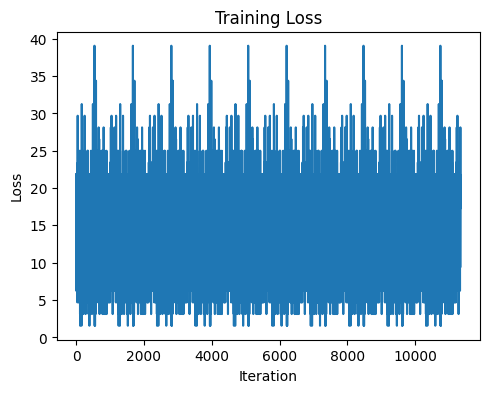

In [55]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred >= 0.5).float()

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Step 5: Plot Loss and Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

# You can also plot other evaluation metrics here
# For example, a Receiver Operating Characteristic (ROC) curve

plt.show()